# **Credit Card Fraud Detection**
### **Project Information:** 
|**Field**              |    **Details**            |   
|-----------------------|---------------------------|
|**Project ID:**        |#CC69845                   |
|**Project Title:**     |Fraud Detection            |
|**Internship Domain:** |Data Science Intern        |
|**Project Level:**     |Entry Level                |
|**Assigned By:**       |CodeClause Internship      |
|**Assigned To:**       |Prince Raj                 |
|**Duration:**          |01 July 2025 – 31 July 2025|


### **Aim:**
- **Detect fraudulent transactions in a credit card dataset using machine learning techniques.**

### **What You Learn:**
- **How to deal with imbalanced datasets using SMOTE.**
- **Building and evaluating classification models like Random Forest.**
- **ROC Curve, Confusion Matrix, AUC evaluation metrics.**


<font size = 5>**Step 1: Import Libraries**</font>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

- #### **I imported all the core libraries I'll need. Pandas and NumPy for data handling, Matplotlib and Seaborn for visualizing insights, and scikit-learn and imbalanced-learn for preprocessing, modeling, and evaluation.I also disabled warnings to keep the output clean.**

<font size=5>**Step 2: Load Dataset**</font>

- #### **I downloaded the dataset directly using KaggleHub to avoid manual uploads. This makes the notebook clean and reusable for future executions.**

In [2]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/prince-raj/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


- #### **Now I loaded the dataset into a pandas DataFrame from the downloaded path.**

In [3]:
# Loading the dataset to start analyzing transactions
csv_file_path = os.path.join(path, 'creditcard.csv')
df = pd.read_csv(csv_file_path)

<font size=5>**Step3: EDA (Exploratory Data Analysis)**</font>

- #### **Just checking how the dataset looks initially. Useful for verifying the structure and columns.**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- #### **I printed the shape to confirm how many rows and columns I'm working with.**

In [5]:
# Checking how many rows and columns are in the dataset
print("Dataset Shape:",df.shape)

Dataset Shape: (284807, 31)


- #### **This gives a statistical overview like mean, std, min, max for each feature. Even though the data is PCA-transformed, it's still useful to understand range and outliers.**

In [6]:
# Getting a quick statistical overview of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- #### **Important to check for missing values early on.**

In [7]:
# Checking for missing values in any column
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


- #### **I checked what the target labels are — expecting only 0 (non-fraud) and 1 (fraud).**

In [8]:
print("Unique values in 'Class':", df['Class'].unique())

Unique values in 'Class': [0 1]


- #### **I plotted how imbalanced the classes are. As expected, fraud transactions are extremely rare.**

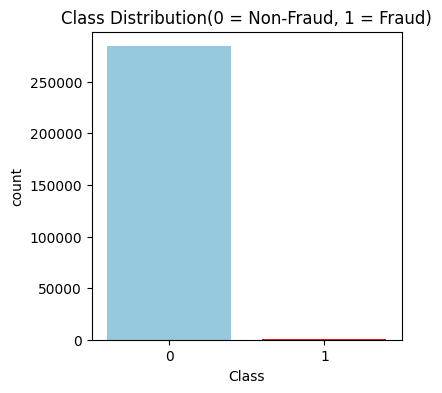

In [9]:
# Visualizing the distribution of fraud vs non-fraud cases & check if the dataset is imbalanced
plt.figure(figsize=(4, 4))
sns.countplot(x='Class', data=df, palette=['skyblue', 'red'])
plt.title("Class Distribution(0 = Non-Fraud, 1 = Fraud)")
plt.show()

- #### **This gives the percentage of frauds to highlight the imbalance problem again before applying SMOTE.**

In [10]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print(f"Fraudulent: {len(fraud)} -> {(len(fraud))/len(df)*100:.2f}%")
print(f"Non-Fraudulent: {len(non_fraud)} -> {len(non_fraud)/len(df)*100:.2f}%")

Fraudulent: 492 -> 0.17%
Non-Fraudulent: 284315 -> 99.83%


<font size=5>**Step 4: Feature Scaling (Time & Amount)**</font>

- #### **Scale 'Amount' and 'Time' because they have wide ranges and can mislead the model.**  
- #### **StandardScaler transforms them to mean=0, std=1.**

- #### **I normalized the Amount and Time features and dropped the original ones. Scaling helps in better model convergence.**

In [11]:
# Scaling 'Amount' and 'Time' to match other features' scale
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Removing original 'Amount' and 'Time' after normalization
df.drop(['Amount', 'Time'], axis=1, inplace=True)

- #### **I used a boxplot to see how transaction amount varies between fraud and non-fraud cases.**

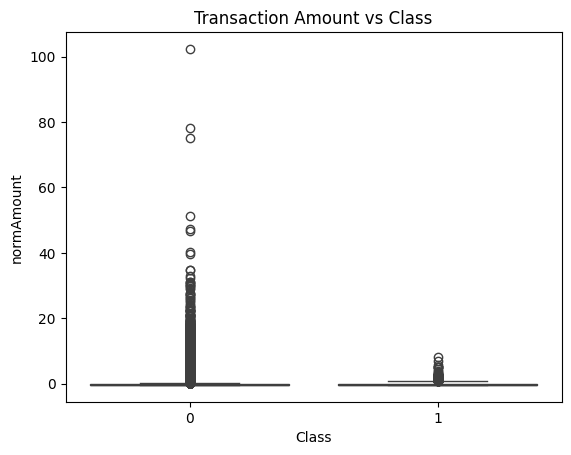

In [12]:
sns.boxplot(x='Class', y='normAmount', data=df)
plt.title('Transaction Amount vs Class')
plt.show()

<font size=5>**Step 5: Split Features & Labels**</font>

- #### **I separated features from the target column.**

In [13]:
X = df.drop('Class', axis = 1)
y = df['Class']

- #### **Split the dataset into 70% training and 30% test data.**

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 <font size=5>**Step 6: Apply SMOTE**</font>

- #### **SMOTE (Synthetic Minority Oversampling Technique) creates synthetic examples for the minority class (fraudulent) to balance the dataset**

- #### **I handled class imbalance using SMOTE. This technique oversamples the minority class by creating synthetic examples.**

In [15]:
# Applying SMOTE to balance the dataset by oversampling minority class
sm = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Original Class distributions:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series((y_train_resampled).value_counts()))

Original Class distributions:
Class
0    199008
1       356
Name: count, dtype: int64

After SMOTE:
Class
0    199008
1    199008
Name: count, dtype: int64


###  **Class Distribution Before and After Applying SMOTE**

#### The dataset is highly imbalanced — the number of legitimate (Class 0) transactions far exceeds fraudulent (Class 1) ones. This imbalance can cause machine learning models to perform poorly on the minority class, as they tend to favor the majority class.

#### To address this, I used **SMOTE (Synthetic Minority Over-sampling Technique)**, which generates synthetic examples of the minority class in the training set.

- #### The **left plot** shows the class distribution before SMOTE — heavily skewed toward non-fraud (Class 0).
- #### The **right plot** shows the class distribution after SMOTE — now both classes are perfectly balanced.

#### This helps the model learn to detect fraud more effectively, without being biased toward the majority class.

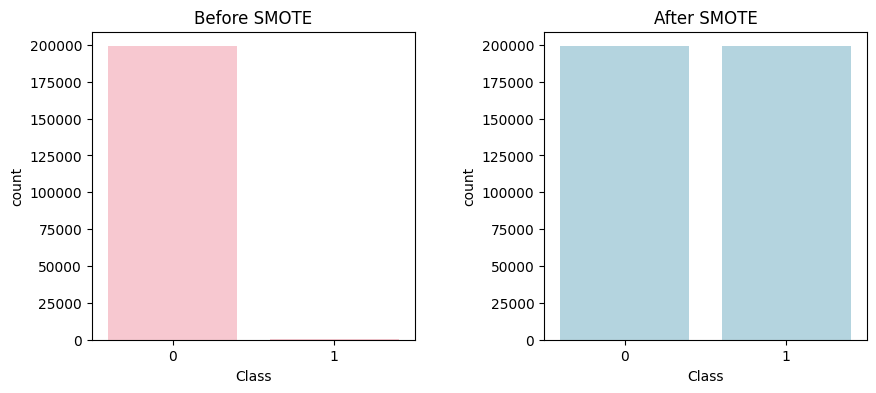

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=y_train, color='pink')
plt.title("Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled,color='lightblue')
plt.title("After SMOTE")
plt.subplots_adjust(wspace=0.4) 
plt.show()

<font size=5>**Step 7: Train Model (Random Forest)**</font>

- #### **I trained a Random Forest — it usually performs well on tabular data and handles overfitting decently.**

In [17]:
# Initializing and training the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

<font size=5>**Step 8: Predict & Evaluate**</font>

- #### **Here's where I evaluated the model with metrics like precision, recall, and F1-score.**

In [18]:
# Checking precision, recall, f1-score for both classes
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



- #### **Confusion matrix gives me deeper insights on true/false positives and negatives.**

In [19]:
# Generating the confusion matrix to visualize predictions
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[85284    23]
 [   18   118]]


- #### **Finally, I plotted the ROC curve and calculated the AUC score. A higher AUC indicates a better-performing model for classification tasks, especially in imbalanced data.**

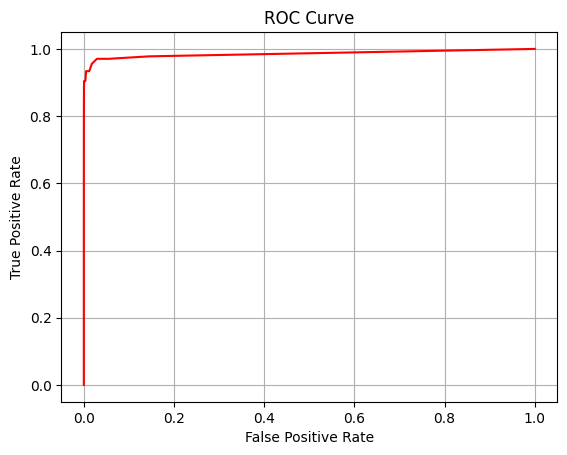

AUC Score: 0.9858


In [20]:
# Calculating true/false positive rates for ROC Curve
probs = model.predict_proba(X_test)[:, 1]
false_pr, true_pr, thresholds = roc_curve(y_test, probs)
plt.plot(false_pr, true_pr, color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

print(f"AUC Score: {roc_auc_score(y_test, probs):.4f}")

## **Conclusion**

- **Balanced the dataset using SMOTE.**
- **Trained Random Forest.**
- **Evaluated with ROC-AUC curve, achieving strong performance.**
- **Learned how preprocessing + resampling improves fraud detection accuracy.**
- **AUC Score -> 0.98**

 **This notebook is my original work for the CodeClause Internship - July 2025.**
